## 1. Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

## 2. Importing the dataset.

In [42]:
university_data = pd.read_csv("C:/Users/sravy/OneDrive/Documents/MSISOM/Sample Practice  Proj/US College Rankings/2022 US College Rankings.csv")

In [43]:
# display the first 3 rows.
university_data.head(10)

,College Name,Adjusted Rank,Tuition,Enrollment Numbers
0,Princeton University,1,56010,4773
1,Columbia University,2,63530,6170
2,Harvard University,2,55587,5222
3,Massachusetts Institute of Technology,2,55878,4361
4,Yale University,5,59950,4703
5,Stanford University,6,56169,6366
6,University of Chicago,6,60963,6989
7,University of Pennsylvania,8,61710,9872
8,California Institute of Technology,9,58680,901
9,Duke University,9,60489,6717


## 3. Looking for missing data and handling it.

In [9]:
university_data.isnull().sum()

College Name          0
Adjusted Rank         0
Tuition               0
Enrollment Numbers    0
dtype: int64

## 4.College Data Analysis.

In [20]:
#lets print the stats of dataset.
university_data.describe()

,Adjusted Rank,Tuition,Enrollment Numbers
count,161.000000,161.000000,161.000000
mean,77.962733,44110.055901,16056.621118
std,44.856701,12537.153779,12730.404742
min,1.000000,6120.000000,901.000000
25%,38.000000,33928.000000,6114.000000
50%,79.000000,44196.000000,11612.000000
75%,117.000000,55776.000000,24505.000000
max,148.000000,63530.000000,63124.000000


In [18]:
#check the data types.
university_data.dtypes

College Name          object
Adjusted Rank          int64
Tuition                int64
Enrollment Numbers     int64
dtype: object

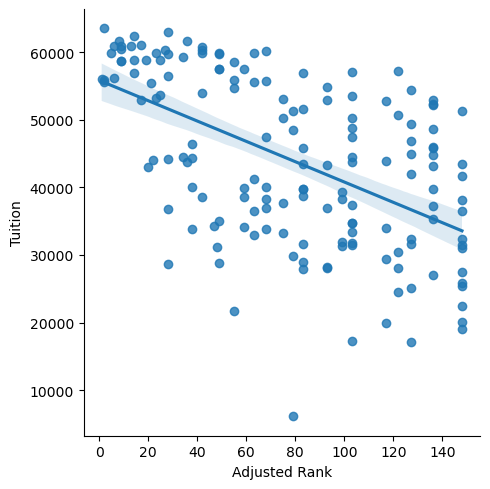

In [19]:

#Lets see the relationship between Rank and Tuition fee by plotting.
sns.lmplot(data = university_data, x = "Adjusted Rank", y = "Tuition")

## 5.Price-Quality Ratio Calculation

In [44]:
# Calculate the price-quality ratio









# Display the updated dataset with the price-quality ratio column
print(university_data.head())


                            College Name  Adjusted Rank  Tuition  \
0                   Princeton University              1    56010   
1                    Columbia University              2    63530   
2                     Harvard University              2    55587   
3  Massachusetts Institute of Technology              2    55878   
4                        Yale University              5    59950   

   Enrollment Numbers  PriceQualityRatio  
0                4773           0.000018  
1                6170           0.000031  
2                5222           0.000036  
3                4361           0.000036  
4                4703           0.000083  


## 6. Data Visualization

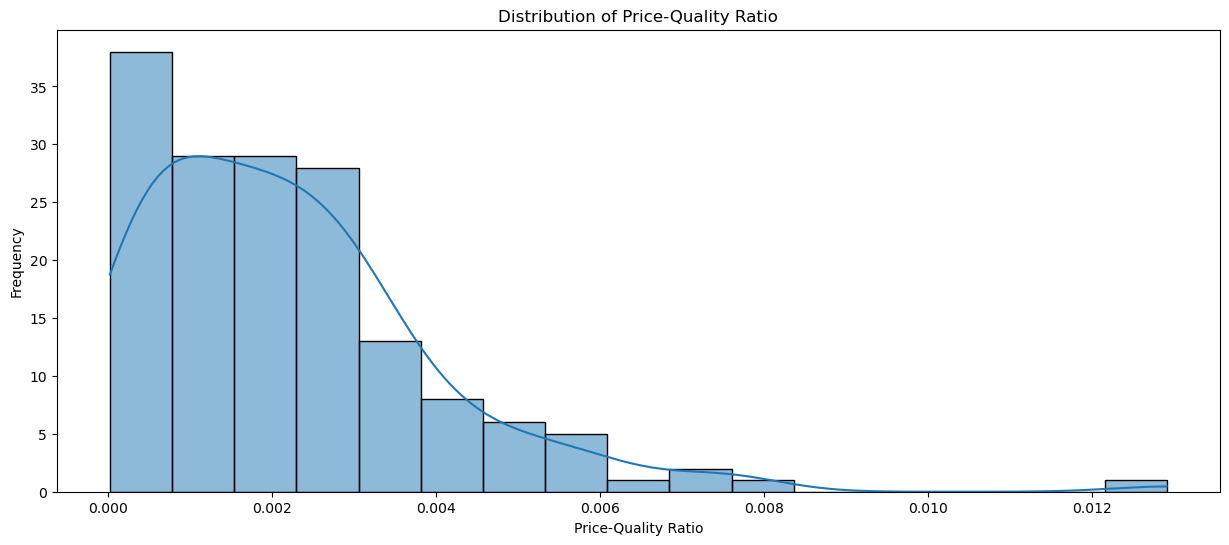

In [28]:
plt.figure(figsize=(15, 6))
sns.histplot(data=university_data, x='PriceQualityRatio', kde=True)
plt.title('Distribution of Price-Quality Ratio')
plt.xlabel('Price-Quality Ratio')
plt.ylabel('Frequency')
plt.show()

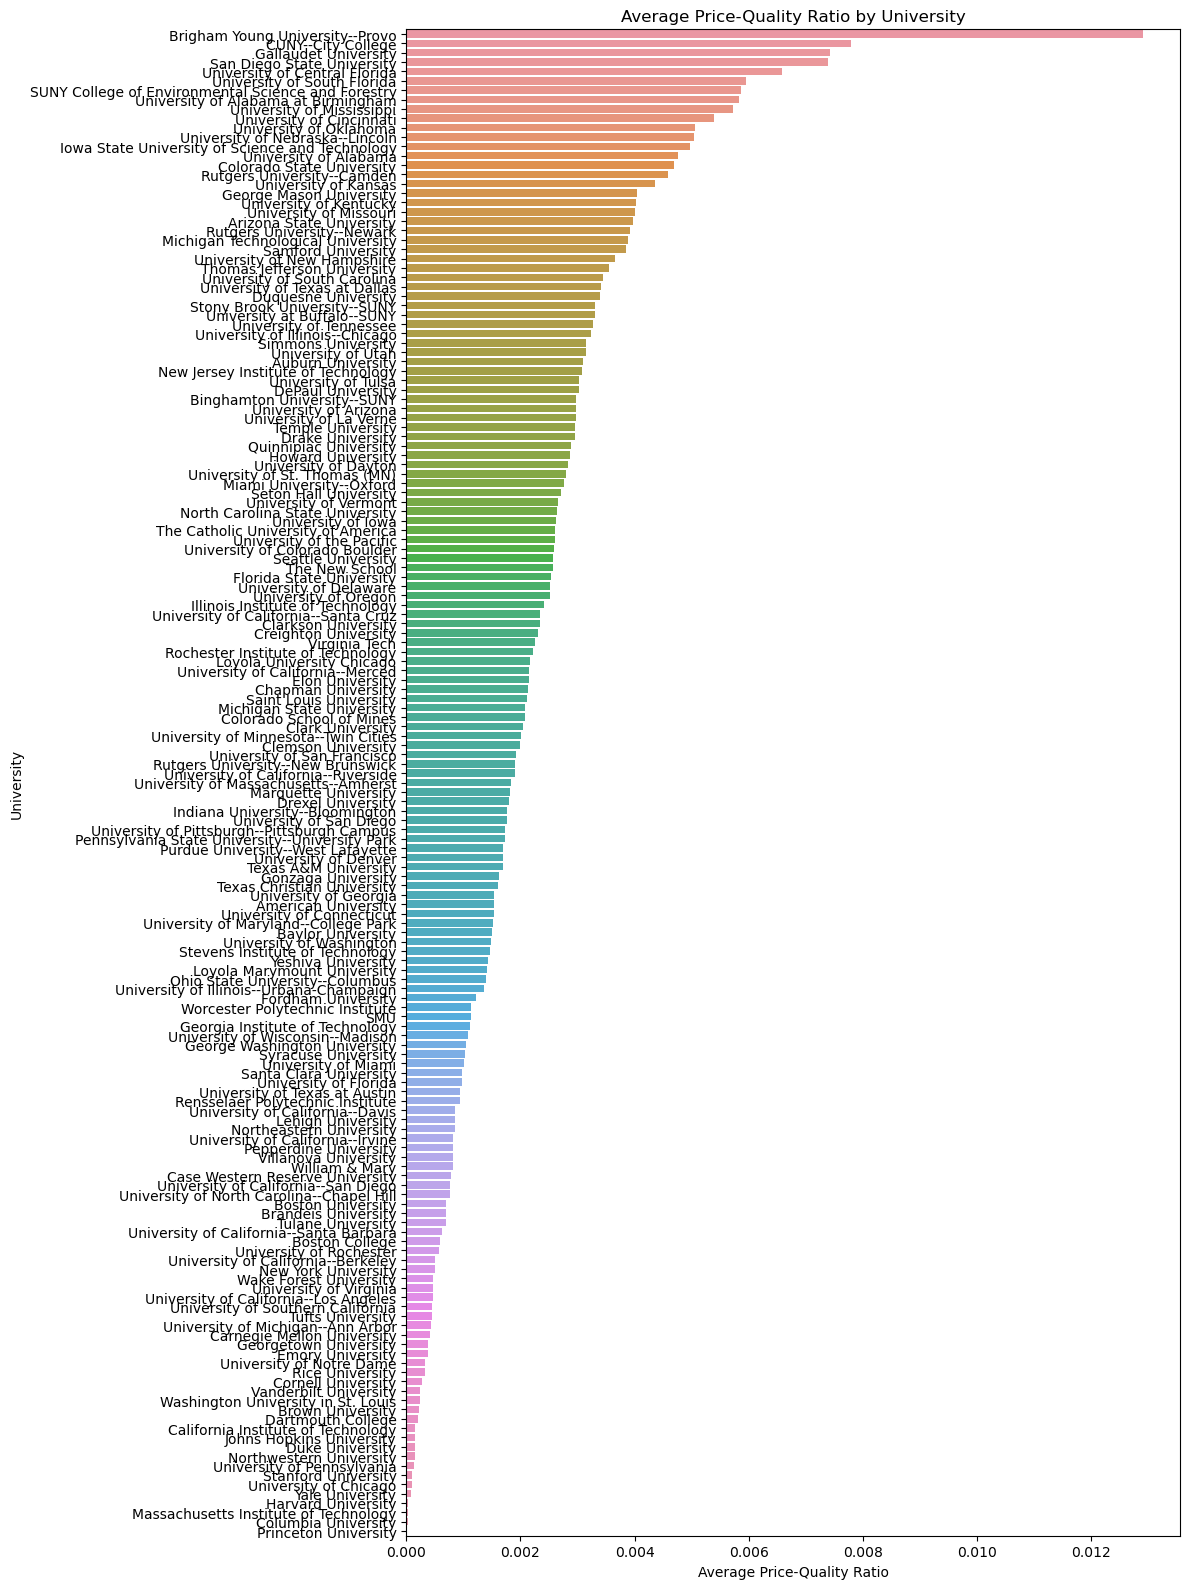

In [27]:
plt.figure(figsize=(12, 16))# Adjust the figure size for better visibility of school names
average_ratio_by_university = university_data.groupby('College Name')['PriceQualityRatio'].mean().reset_index()
average_ratio_by_university = average_ratio_by_university.sort_values(by='PriceQualityRatio', ascending=False)

sns.barplot(data=average_ratio_by_university, y='College Name', x='PriceQualityRatio')
plt.title('Average Price-Quality Ratio by University')
plt.xlabel('Average Price-Quality Ratio')
plt.ylabel('University')
plt.tight_layout()  # Add spacing between the plot elements

plt.show()

## 7. Analysis and Interpretation

In [29]:
# Highest price-quality ratio
highest_ratio = university_data[university_data['PriceQualityRatio'] == university_data['PriceQualityRatio'].max()]
highest_ratio_university = highest_ratio['College Name'].values[0]

# Lowest price-quality ratio
lowest_ratio = university_data[university_data['PriceQualityRatio'] == university_data['PriceQualityRatio'].min()]
lowest_ratio_university = lowest_ratio['College Name'].values[0]

print("University with the highest price-quality ratio:", highest_ratio_university)
print("University with the lowest price-quality ratio:", lowest_ratio_university)

University with the highest price-quality ratio: Brigham Young University--Provo
University with the lowest price-quality ratio: Princeton University


In [33]:
high_ratio_universities = university_data[university_data['PriceQualityRatio'] > university_data['PriceQualityRatio'].mean()]
mean_enrollment = high_ratio_universities['Enrollment Numbers'].mean()

print("Average enrollment in universities with high price-quality ratio:", mean_enrollment)

Average enrollment in universities with high price-quality ratio: 17291.925373134327


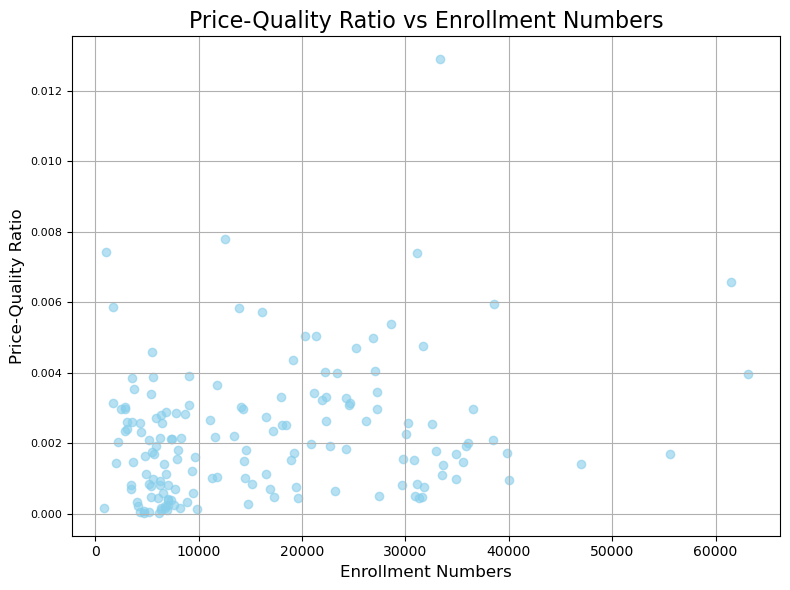

In [36]:
plt.figure(figsize=(8, 6))

# Scatter plot of price-quality ratio vs enrollment numbers
plt.scatter(university_data['Enrollment Numbers'], university_data['PriceQualityRatio'], color='skyblue', alpha=0.6)

plt.title('Price-Quality Ratio vs Enrollment Numbers', fontsize=16)
plt.xlabel('Enrollment Numbers', fontsize=12)
plt.ylabel('Price-Quality Ratio', fontsize=12)

# Adjust font size of x-axis tick labels
plt.xticks(fontsize=10)

# Adjust font size of y-axis tick labels
plt.yticks(fontsize=8)

# Add grid lines
plt.grid(True)

# Add spacing between the plot elements
plt.tight_layout()

#display the plot
plt.show()


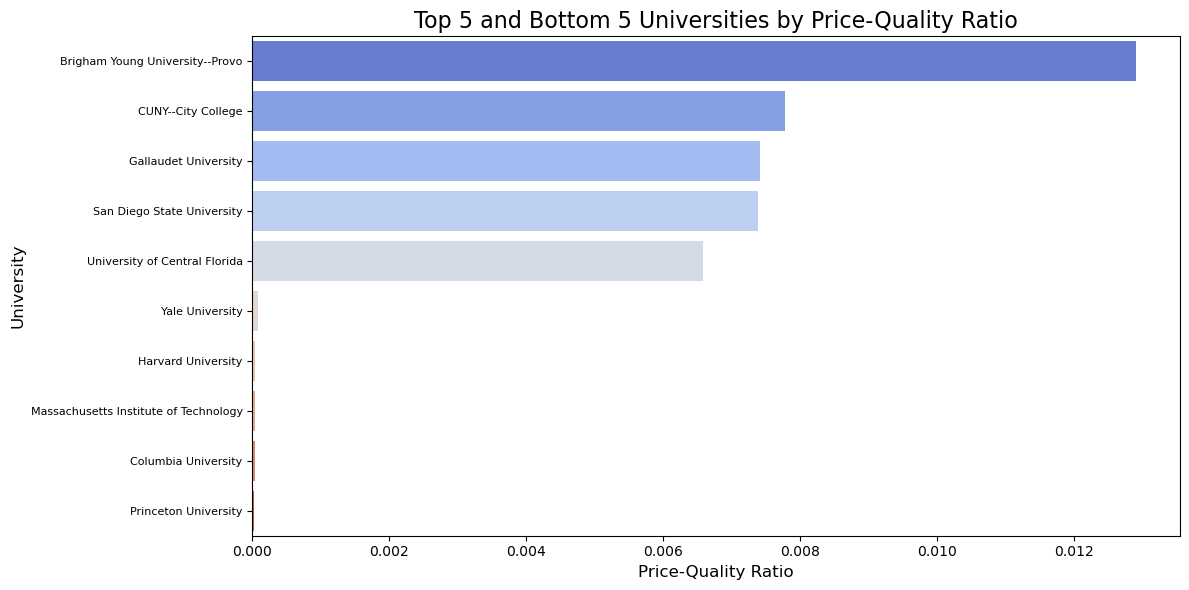

In [38]:
plt.figure(figsize=(12, 6))

# Sort the data by price-quality ratio in descending order

sorted_university_data = university_data.sort_values('PriceQualityRatio', ascending=False)

# Select the top 5 and bottom 5 universities
top_5 = sorted_university_data.head(5)
bottom_5 = sorted_university_data.tail(5)

# Concatenate the top and bottom dataframes
combined_university_data = pd.concat([top_5, bottom_5])

# Create the horizontal bar plot
sns.barplot(data=combined_university_data, x='PriceQualityRatio', y='College Name', palette='coolwarm')

plt.title('Top 5 and Bottom 5 Universities by Price-Quality Ratio', fontsize=16)
plt.xlabel('Price-Quality Ratio', fontsize=12)
plt.ylabel('University', fontsize=12)

plt.xticks(fontsize=10)  # Adjust font size of x-axis tick labels
plt.yticks(fontsize=8)  # Adjust font size of y-axis tick labels

plt.tight_layout()  # Add spacing between the plot elements

plt.show()